# UNIVARIADO
## df_174

Este es el notebook donde hago todo los modelos necesarios para mi segunda serie.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Conv2D, MaxPooling2D, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
import optuna

In [2]:
df1 = pd.read_csv("univariate/Hourly-train.csv")
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0


In [3]:
df1.set_index(df1.columns[0], inplace=True)

# Transponer el DataFrame
df_t = df1.T

df_t

V1,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,H405,H406,H407,H408,H409,H410,H411,H412,H413,H414
V2,605.0,3124.0,1828.0,6454.0,4263.0,5780.0,52817.0,32479.0,39455.0,513.0,...,68.0,21.0,214.0,19.0,31.0,153.0,24.0,19.0,21.0,15.0
V3,586.0,2990.0,1806.0,6324.0,4297.0,5497.0,51773.0,31018.0,38279.0,512.0,...,48.0,15.0,238.0,31.0,39.0,196.0,30.0,30.0,16.0,13.0
V4,586.0,2862.0,1897.0,6075.0,4236.0,5306.0,50907.0,30033.0,36944.0,506.0,...,33.0,15.0,130.0,25.0,22.0,163.0,22.0,12.0,17.0,13.0
V5,559.0,2809.0,1750.0,5949.0,4080.0,5178.0,50224.0,27716.0,35984.0,500.0,...,21.0,17.0,69.0,23.0,17.0,131.0,14.0,16.0,19.0,16.0
V6,511.0,2544.0,1679.0,5858.0,3883.0,5235.0,49496.0,25067.0,33721.0,490.0,...,30.0,15.0,68.0,14.0,13.0,82.0,19.0,13.0,16.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138.0,80.0,423.0,257.0,69.0,108.0,76.0,71.0,59.0,48.0
V958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.0,71.0,290.0,194.0,53.0,70.0,66.0,70.0,58.0,41.0
V959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,74.0,264.0,110.0,50.0,72.0,67.0,73.0,53.0,35.0
V960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.0,41.0,194.0,81.0,54.0,79.0,51.0,39.0,38.0,26.0


In [4]:
df_t["H174"]

V2      12.2
V3      11.4
V4      11.1
V5      10.7
V6      10.4
        ... 
V957    24.4
V958    24.9
V959    25.3
V960    25.6
V961    25.3
Name: H174, Length: 960, dtype: float64

In [5]:
df2 = pd.read_csv("univariate/m4_info.csv")
df2.head(2)

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00


In [6]:
mine = ['H309', 'H291', 'H143', 'H366', 'H174']

filtered_df = df2[df2['M4id'].isin(mine)]

print(filtered_df)

       M4id category  Frequency  Horizon      SP    StartingDate
99728  H143    Other         24       48  Hourly   06-10-13 3:00
99759  H174    Other         24       48  Hourly  17-05-10 12:00
99876  H291    Other         24       48  Hourly  02-06-10 12:00
99894  H309    Other         24       48  Hourly  10-05-10 12:00
99951  H366    Other         24       48  Hourly  01-01-17 12:00


In [7]:

# Definir la fecha de inicio
start_date = pd.to_datetime("17-05-10 12:00", format="%d-%m-%y %H:%M")

# Crear un rango de fechas con una hora de diferencia para cada fila de H143
index = pd.date_range(start=start_date, periods=len(df_t["H174"]), freq="H")

# Asignar el nuevo índice de tiempo a la serie
df_h174 = df_t["H174"].copy()
df_h174.index = index

df_h174 = pd.DataFrame({"time": index, "y": df_t["H174"].values})
df_h174 = df_h174.dropna(subset=['y'])

df_h174


/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/2996351564.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index = pd.date_range(start=start_date, periods=len(df_t["H174"]), freq="H")


,time,y
0,2010-05-17 12:00:00,12.2
1,2010-05-17 13:00:00,11.4
2,2010-05-17 14:00:00,11.1
3,2010-05-17 15:00:00,10.7
4,2010-05-17 16:00:00,10.4
...,...,...
955,2010-06-26 07:00:00,24.4
956,2010-06-26 08:00:00,24.9
957,2010-06-26 09:00:00,25.3
958,2010-06-26 10:00:00,25.6


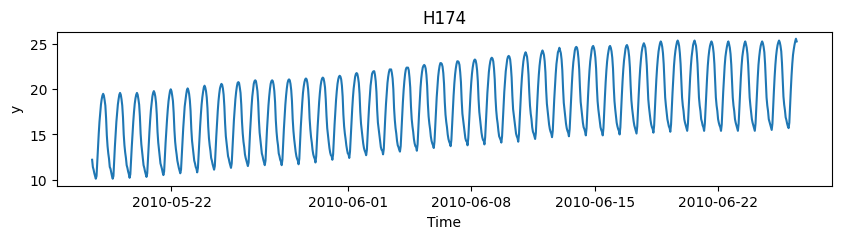

In [8]:
df_h174['time'] = pd.to_datetime(df_h174['time'])

plt.figure(figsize=(10, 2))

plt.plot(df_h174['time'], df_h174['y'], label='H143')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('H174')

plt.show()


In [9]:
# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_h174["y"])

# Mostrar los resultados
print("Resultados de la Prueba de Dickey-Fuller Aumentada:")
print(f"Estadístico ADF: {result[0]}")
print(f"Valor p: {result[1]}")
print(f"Número de retardos usados: {result[2]}")
print(f"Número de observaciones: {result[3]}")
print("Valores críticos:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia del 5%
if result[1] < alpha:
    print("\nConclusión: La serie es estacionaria (se rechaza la hipótesis nula).")
else:
    print("\nConclusión: La serie NO es estacionaria (no se puede rechazar la hipótesis nula).")


Resultados de la Prueba de Dickey-Fuller Aumentada:
Estadístico ADF: -9.091742564373343
Valor p: 3.807932672163276e-15
Número de retardos usados: 22
Número de observaciones: 937
Valores críticos:
  1%: -3.4373481911362997
  5%: -2.864629502968925
  10%: -2.56841503507527

Conclusión: La serie es estacionaria (se rechaza la hipótesis nula).


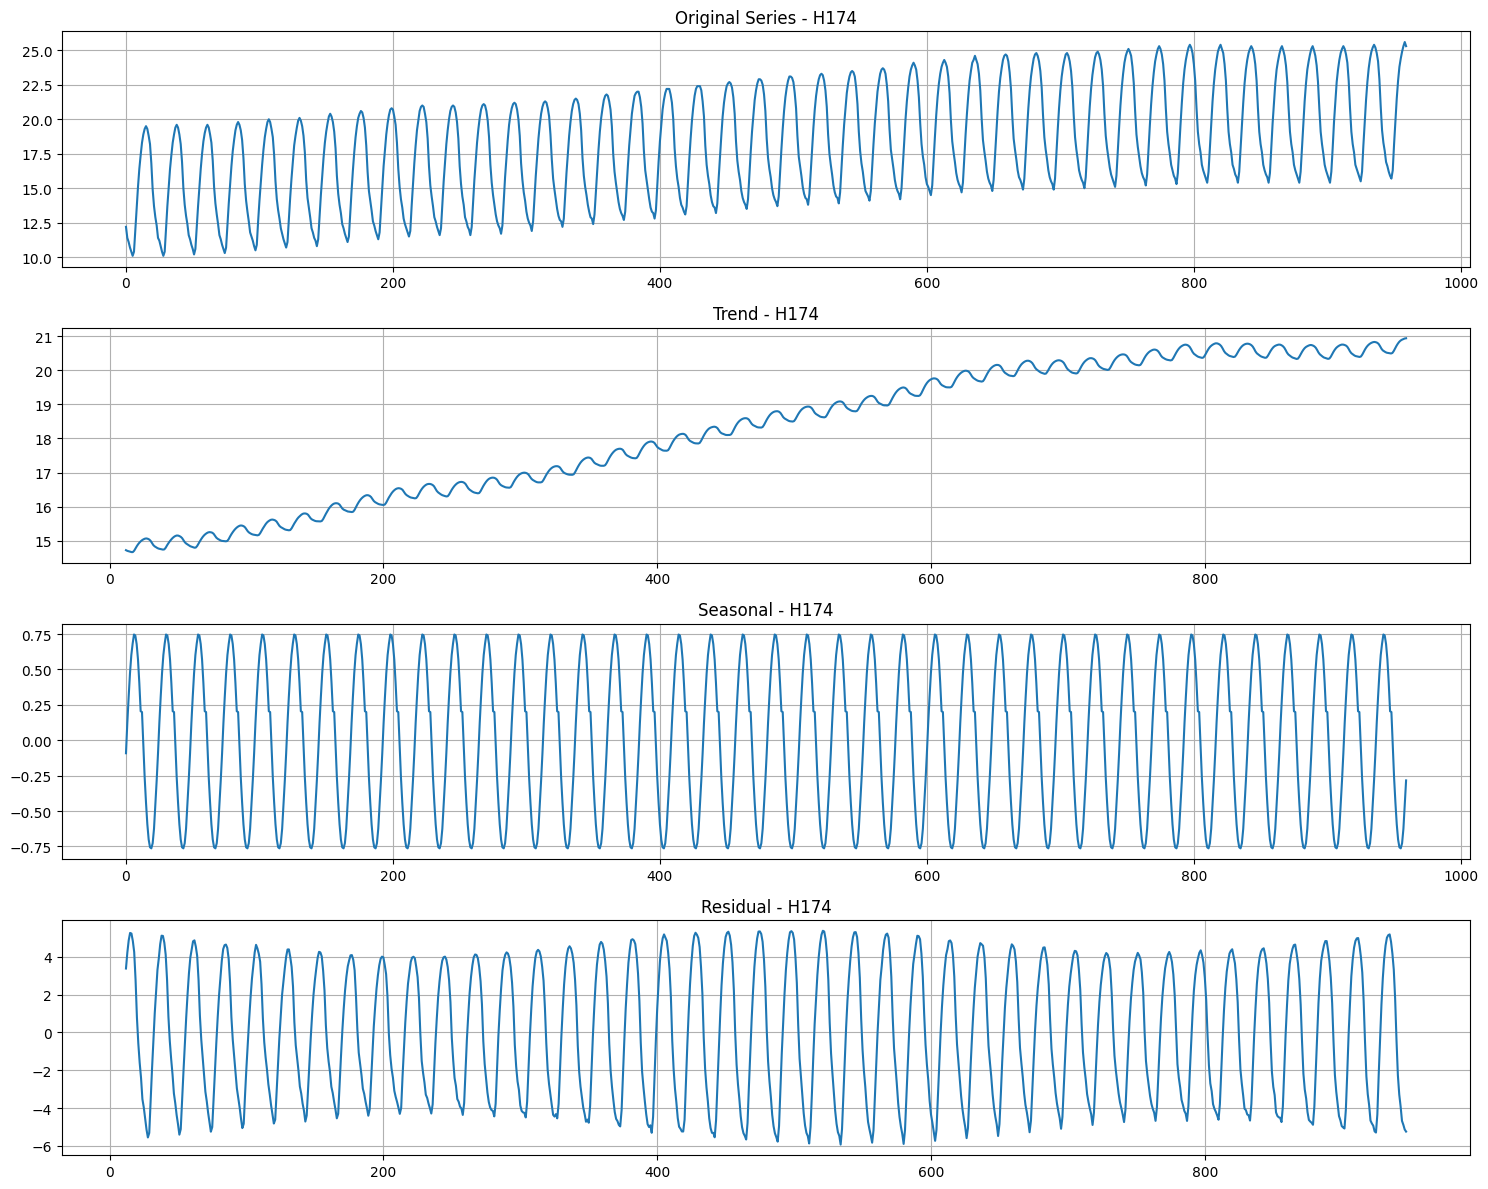

In [10]:
def plot_decomposition(series, series_name, period=24): #24 por que son por hora
    decomposition = seasonal_decompose(series, model='additive', period=period)

    # Crear subgráficos
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    titles = ["Original Series", "Trend", "Seasonal", "Residual"]
    components = [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid]

    for ax, title, comp in zip(axes, titles, components):
        ax.plot(comp)
        ax.set_title(f"{title} - {series_name}")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Aplicar la descomposición estacional
plot_decomposition(df_h174["y"], "H174")


Esta tiene una tendencia a la alta un poco clara, aunque no es muy pronunciada. En la de estacionalidad, tiene ciclos muy regulares, y el test de dickey fuller dice que es estacional. Tiene residuos que parecen ser ruido blanco. Aunque, la serie tiene una pequeña tendencia, considero que es minima. Intentare hacer el modelo primero sin diferenciación, y si los resultados no son buenos lo intentaré con diferenciación.  

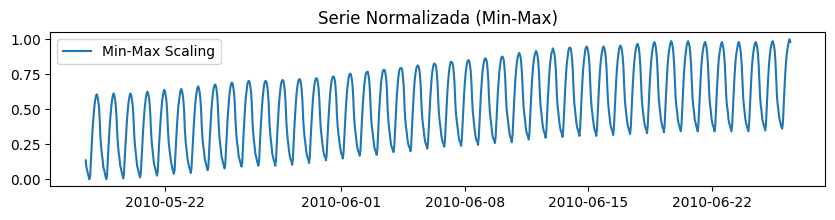

In [11]:
#normalizar los datos para las redes
scaler_minmax = MinMaxScaler()
df_h174['y_scaled'] = scaler_minmax.fit_transform(df_h174[['y']])

plt.figure(figsize=(10, 2))
plt.plot(df_h174['time'], df_h174['y_scaled'], label="Min-Max Scaling")
plt.title("Serie Normalizada (Min-Max)")
plt.legend()

# Division

In [12]:
# Definir los tamaños de los conjuntos (por ejemplo, 70% para entrenamiento, 15% para validación y 15% para prueba)
train_size = int(len(df_h174) * 0.7)
val_size = int(len(df_h174) * 0.15)
test_size = len(df_h174) - train_size - val_size

# Dividir la serie en entrenamiento, validación y prueba
train, val, test = df_h174[:train_size], df_h174[train_size:train_size+val_size], df_h174[train_size+val_size:]

# Verificar la división
print(f"Entrenamiento: {len(train)} | Validación: {len(val)} | Prueba: {len(test)}")


Entrenamiento: 672 | Validación: 144 | Prueba: 144


In [13]:
test["time"] = pd.to_datetime(test["time"])  

last_date = test["time"].iloc[-1]  # Última fecha en el conjunto de prueba
print(f"Última fecha de la prueba: {last_date}")


horizon = 48

#fechas de predicción a partir de la última fecha del conjunto de prueba
prediction_dates = pd.date_range(start=last_date, periods=horizon + 1, freq='H')[1:]

print("Fechas de predicción:")
print(prediction_dates)
print(len(prediction_dates))


Última fecha de la prueba: 2010-06-26 11:00:00
Fechas de predicción:
DatetimeIndex(['2010-06-26 12:00:00', '2010-06-26 13:00:00',
               '2010-06-26 14:00:00', '2010-06-26 15:00:00',
               '2010-06-26 16:00:00', '2010-06-26 17:00:00',
               '2010-06-26 18:00:00', '2010-06-26 19:00:00',
               '2010-06-26 20:00:00', '2010-06-26 21:00:00',
               '2010-06-26 22:00:00', '2010-06-26 23:00:00',
               '2010-06-27 00:00:00', '2010-06-27 01:00:00',
               '2010-06-27 02:00:00', '2010-06-27 03:00:00',
               '2010-06-27 04:00:00', '2010-06-27 05:00:00',
               '2010-06-27 06:00:00', '2010-06-27 07:00:00',
               '2010-06-27 08:00:00', '2010-06-27 09:00:00',
               '2010-06-27 10:00:00', '2010-06-27 11:00:00',
               '2010-06-27 12:00:00', '2010-06-27 13:00:00',
               '2010-06-27 14:00:00', '2010-06-27 15:00:00',
               '2010-06-27 16:00:00', '2010-06-27 17:00:00',
               '

/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/2284990760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["time"] = pd.to_datetime(test["time"])
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/2284990760.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  prediction_dates = pd.date_range(start=last_date, periods=horizon + 1, freq='H')[1:]


# Creación de modelos

In [14]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 48  # Horizonte de predicción
n_features = 1


In [15]:
# Aplicar la función de división
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)


In [16]:
# Ajustar la forma para CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

### CNN1

In [17]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/50


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0404 - val_loss: 0.0082
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8490e-04 - val_loss: 5.2359e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8342e-04 - val_loss: 4.1776e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7635e-04 - val_loss: 2.4830e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2324e-04 - val_loss: 1.8765e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0921e-04 - val_loss: 2.5582e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7125e-05 - val_loss: 1.4171e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6661e-05 - val_loss: 1.6899e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3030e-05 - val_loss: 9.6919e-05
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8408e-05 - val_loss: 6.4993e-05
Epoch 12/50
2

<Axes: >

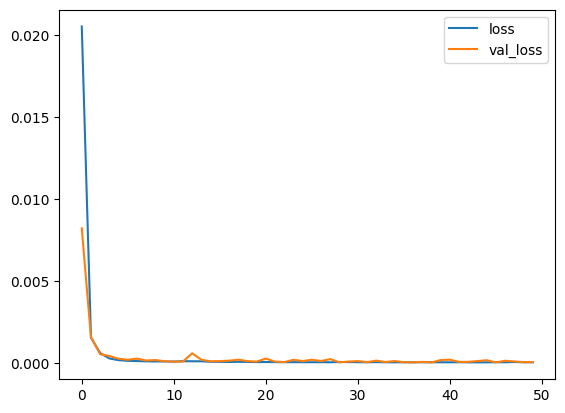

In [18]:
pd.DataFrame(history.history).plot()

In [19]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


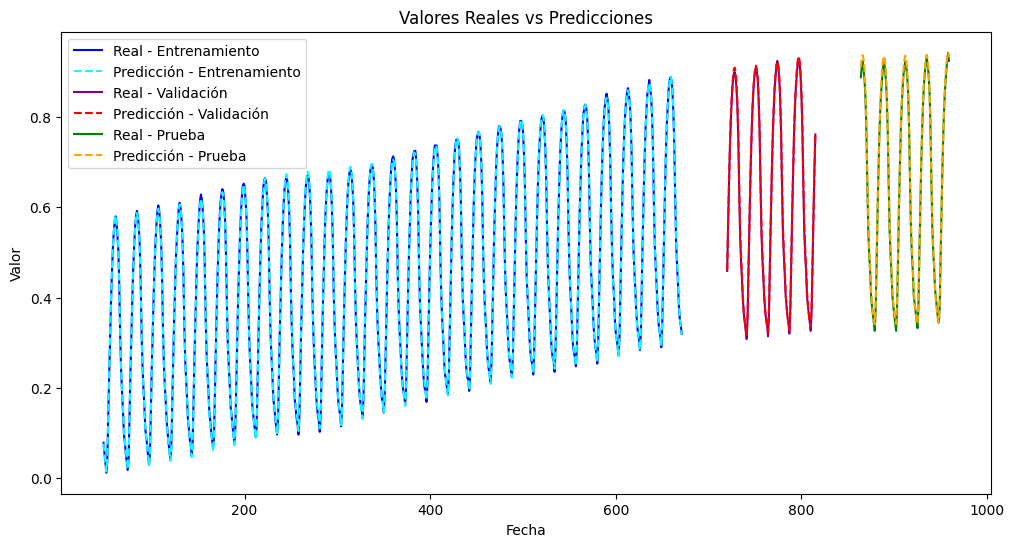

In [20]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [21]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100


print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0288
RMSE: 0.0322
R2 : 0.9806


Obtuve un muy buen modelo, con esta primera cnn :)

In [22]:
print(f"Esta primera CNN tiene una primera capa para regresión en series de tiempo. "
      "Usa convoluciones para extraer los patrones.\n"
      "Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. "
      "Tiene al final una capa densa para hacer la predicción final.\n"
      "Le puse 50 épocas para iniciar y que midiera el MSE.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.\n"
      f"En R² obtuve {r2:.4f}, lo que me dice que mi modelo explica bien la variabilidad de los datos.\n")

print("Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.")


Esta primera CNN tiene una primera capa para regresión en series de tiempo. Usa convoluciones para extraer los patrones.
Apliqué unas capas de pooling para reducir las dimensiones y mejorar la eficiencia. Tiene al final una capa densa para hacer la predicción final.
Le puse 50 épocas para iniciar y que midiera el MSE.

Al evaluarlo con test, el MAE es de 0.0288. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0322, lo que indica que mi modelo tiene buenas predicciones y que las predicciones no se desvían mucho de los valores reales.
En R² obtuve 0.9806, lo que me dice que mi modelo explica bien la variabilidad de los datos.

Lo que podría hacer para mejorarlo es experimentar con más filtros en la capa convolucional y tal vez aumentar las épocas para ver si consigo mejores resultados.


### CNN2

In [23]:
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0762 - val_loss: 0.0027
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2718e-04 - val_loss: 9.6930e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4024e-04 - val_loss: 5.1390e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2226e-04 - val_loss: 5.7421e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8526e-04 - val_loss: 3.1726e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0774e-04 - val_loss: 2.5368e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5815e-05 - val_loss: 8.1070e-05
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1252e-05 - val_loss: 1.3953e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2653e-05 - val_loss: 1.2896e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7148e-05 - val_loss: 2.7285e-04
Epo

<Axes: >

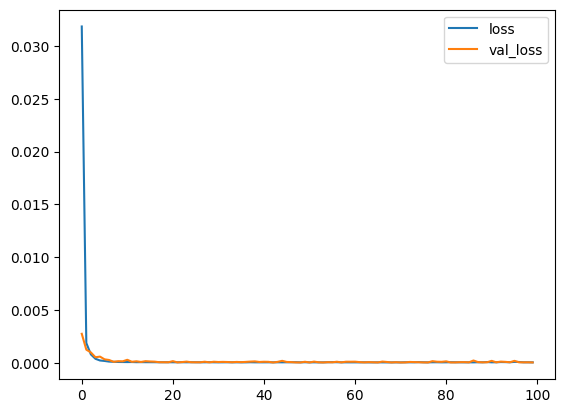

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))  

MinMaxScaler()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


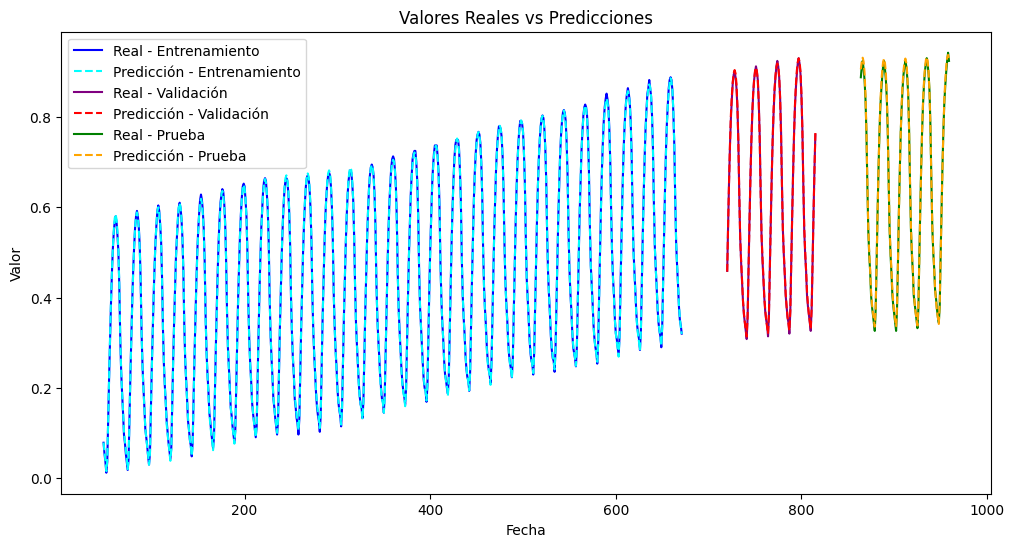

In [26]:

# Predicciones entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)  
y_test_pred = model.predict(X_test)

#quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred)  
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

#  valores reales vs. predichos 
plt.figure(figsize=(12, 6))

# Reshape a 2D para aplicar inverse_transform
y_train_reshaped = y_train.reshape(-1, 1)  
plt.plot(train.index[n_steps:], scaler.inverse_transform(y_train_reshaped), label='Real - Entrenamiento', color='blue')
plt.plot(train.index[n_steps:], y_train_pred_inv, label='Predicción - Entrenamiento', color='cyan', linestyle='dashed')

# validación
y_val_reshaped = y_val.reshape(-1, 1)  
plt.plot(val.index[n_steps:], scaler.inverse_transform(y_val_reshaped), label='Real - Validación', color='purple')
plt.plot(val.index[n_steps:], y_val_pred_inv, label='Predicción - Validación', color='red', linestyle='dashed')

# prueba
y_test_reshaped = y_test.reshape(-1, 1)  
plt.plot(test.index[n_steps:], scaler.inverse_transform(y_test_reshaped), label='Real - Prueba', color='green')
plt.plot(test.index[n_steps:], y_test_pred_inv, label='Predicción - Prueba', color='orange', linestyle='dashed')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


In [27]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")



Evaluación del Modelo en Test:
MAE : 0.0334
RMSE: 0.0364
R2 : 0.9752


Este modelo, fue aun un poquito mejor, la r aumento un poco.


In [28]:
print(f"Esta segunda CNN también está diseñada para regresión en series de tiempo. "
      "Se basa en convoluciones para detectar patrones en los datos.\n"
      "Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.\n"
      "Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, "
      "seguida de una capa densa para la predicción final.\n"
      "Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, "
      "ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.")


Esta segunda CNN también está diseñada para regresión en series de tiempo. Se basa en convoluciones para detectar patrones en los datos.
Aumenté la cantidad de filtros en la capa convolucional a 128, lo que permite captar más características.
Mantiene una capa de pooling para reducir dimensiones y mejorar eficiencia, seguida de una capa densa para la predicción final.
Esta vez entrené el modelo con 100 épocas para intentar mejorar los resultados.

Al evaluarlo con test, el MAE es de 0.0334. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0364, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.9752, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Para mejorar aún más el modelo, podría probar con diferentes tamaños de kernel en la convolución, ajustar la cantidad de filtros, o agregar más capas convolucionales para extraer patrones más complejos.


In [29]:
# mi horizonte
horizonte = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(horizonte):
    # prediccion
    pred = model.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━

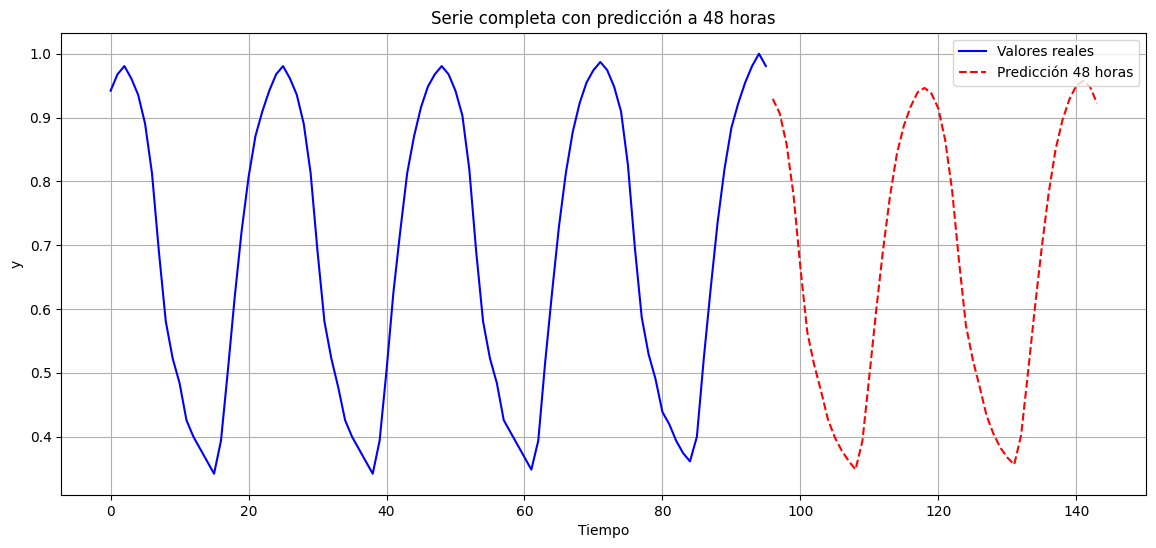

In [30]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


Se ve bastante bien mi predicción creo yo. Los picos parecen tener la misma estacionalidad diaria. Solo hice la prediccion del mejor modelo.

### CNN3

In [31]:
model3 = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Evita el sobreajuste

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    
    Dense(50, activation='relu'),
    
    Dense(1)
])

optimizer = Adam(learning_rate=0.001) 
model3.compile(optimizer=optimizer, loss='mse')

history = model3.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    verbose=1
)

loss = model3.evaluate(X_test, y_test)
print(f'Error cuadrático medio en prueba: {loss}')

Epoch 1/100


/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0941 - val_loss: 0.0045
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0157
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0091
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0092
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0144
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0092
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0098
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0106
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0143
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_lo

<Axes: >

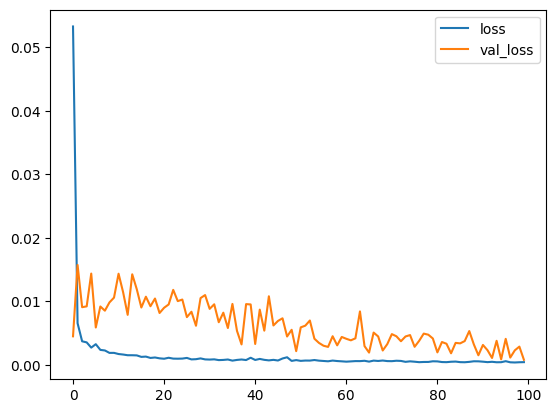

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
# predicciones
y_train_pred = model3.predict(X_train)
y_val_pred = model3.predict(X_val) 
y_test_pred = model3.predict(X_test)

# quitar normalizacion
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_val_pred_inv = scaler.inverse_transform(y_val_pred) 
y_test_pred_inv = scaler.inverse_transform(y_test_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
mae = mean_absolute_error(y_test_reshaped, y_test_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred_inv))
r2 = r2_score(y_test_reshaped, y_test_pred_inv)
mape = np.mean(np.abs((y_test_reshaped - y_test_pred_inv) / y_test_reshaped)) * 100

print(f"Evaluación del Modelo en Test:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 : {r2:.4f}")


Evaluación del Modelo en Test:
MAE : 0.0599
RMSE: 0.0657
R2 : 0.9194


Este modelo no fue tan bueno como los anteriores, pero aun asi tienes buenos resultados.

In [35]:
print(f"Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.\n"
      "Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.\n"
      "Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.\n"
      "El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.\n"
      "Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.\n")

print(f"Al evaluarlo con test, el MAE es de {mae:.4f}. Esto significa que en promedio el modelo se equivoca por esa cantidad.\n"
      f"El RMSE es {rmse:.4f}, lo que indica que las predicciones tienen un bajo margen de error.\n"
      f"En R² obtuve {r2:.4f}, lo que sugiere que el modelo explica bien la variabilidad de los datos.\n")

print("Este modelo no necesariamente fue mejor.")


Esta tercera CNN sigue siendo un modelo para regresión en series de tiempo, pero con algunas mejoras para evitar el sobreajuste.
Se mantienen las capas convolucionales para extraer patrones, pero ahora hay dos capas en lugar de una, lo que permite capturar características más complejas.
Además, agregué capas de Dropout después de cada MaxPooling para reducir el sobreajuste, eliminando aleatoriamente algunas conexiones durante el entrenamiento.
El optimizador utilizado es Adam con una tasa de aprendizaje de 0.001, lo que ayuda a ajustar los pesos de manera eficiente.
Al final, la red tiene una capa densa para la predicción, y se entrenó durante 100 épocas.

Al evaluarlo con test, el MAE es de 0.0599. Esto significa que en promedio el modelo se equivoca por esa cantidad.
El RMSE es 0.0657, lo que indica que las predicciones tienen un bajo margen de error.
En R² obtuve 0.9194, lo que sugiere que el modelo explica bien la variabilidad de los datos.

Este modelo no necesariamente fue mejor.

In [36]:
# mi horizonte
future_steps = 48  

last_input = X_test[-1]  # Última secuencia de entrada del test
forecast = []

for _ in range(future_steps):
    # prediccion
    pred = model3.predict(last_input.reshape(1, n_steps, n_features))
    
    # Desnormalizar la predicción
    pred_inv = scaler.inverse_transform(pred)
    forecast.append(pred_inv[0, 0])  # Guardar solo el valor predicho

    # Crear la nueva entrada para la siguiente predicción
    last_input = np.roll(last_input, -1, axis=0)  # Desplazar datos
    last_input[-1] = pred  # Agregar la nueva predicción al final

# Convertir a un array 
forecast = np.array(forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━

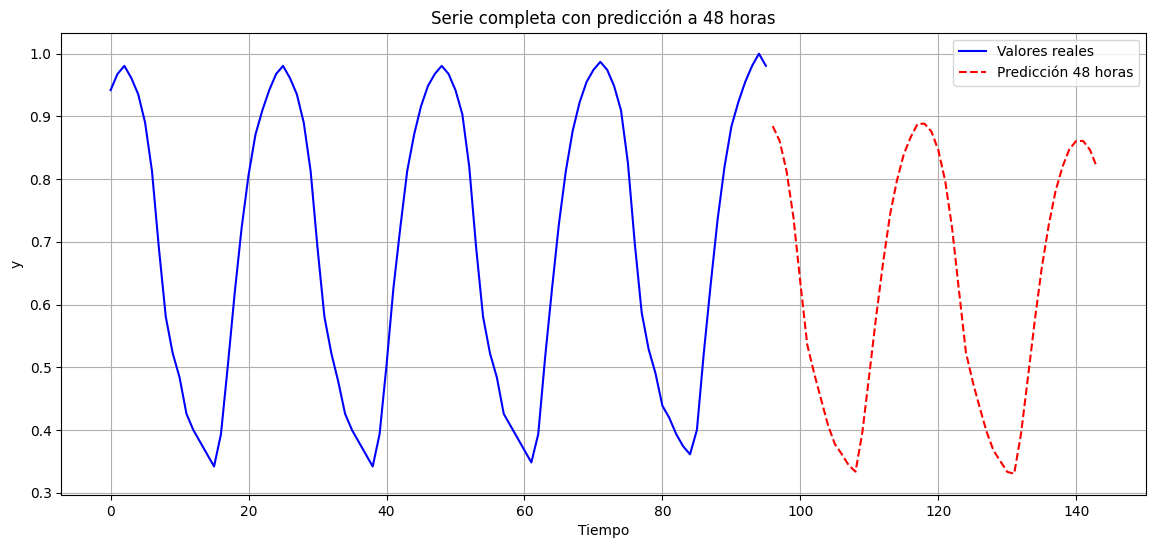

In [37]:
#datos reales
time_real = np.arange(len(y_test_reshaped))

#  predicciones futuras
time_future = np.arange(len(y_test_reshaped), len(y_test_reshaped) + 48)

#valores reales
plt.figure(figsize=(14, 6))
plt.plot(time_real, y_test_reshaped, label="Valores reales", linestyle='-', color='blue')

# predicciones
plt.plot(time_future, forecast, label="Predicción 48 horas", linestyle='--', color='red')

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.title("Serie completa con predicción a 48 horas")
plt.legend()
plt.grid(True)
plt.show()


En efecto, las predicciones no se ven tan "perfectas" como el modelo anterior, pero aun asi se ajustan bien.

## Optuna cnn

In [39]:
def objective(trial):
    filters = trial.suggest_categorical("filters", [32, 64, 128, 256])
    kernel_size = trial.suggest_int("kernel_size", 2, 5)
    pool_size = trial.suggest_int("pool_size", 2, 4)
    dense_units = trial.suggest_int("dense_units", 10, 100)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
    
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(n_steps, n_features)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1)
    ])
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    
    loss = model.evaluate(X_val, y_val, verbose=0)
    return loss

# Realizar la optimización con Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Obtener los mejores parámetros después de la optimización
best_params = study.best_trial.params
print("Best parameters found by Optuna:", best_params)


[I 2025-04-03 11:35:15,792] A new study created in memory with name: no-name-513a554a-e690-4599-9f64-8d7dbccc8095
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/3777157279.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.01)
/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-04-03 11:35:20,224] Trial 0 finished with value: 4.471002102945931e-05 and parameters: {'filters': 128, 'kernel_size': 5, 

Best parameters found by Optuna: {'filters': 128, 'kernel_size': 5, 'pool_size': 3, 'dense_units': 50, 'batch_size': 32, 'learning_rate': 0.0014094476057475783}


In [40]:
# modelo con los mejores hiperparámetros
best_model = Sequential([
    Conv1D(filters=best_params["filters"], kernel_size=best_params["kernel_size"], activation='relu', input_shape=(n_steps, n_features)),
    MaxPooling1D(pool_size=best_params["pool_size"]),
    Flatten(),
    Dense(best_params["dense_units"], activation='relu'),
    Dense(1)
])


In [41]:
# usar los mejores parametros
best_optimizer = Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mse')

#entranar el modelo
best_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)), 
               epochs=500, batch_size=best_params["batch_size"], verbose=1)



Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1009  
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3579e-04
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7330e-04
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1064e-04
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9489e-04
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7799e-04
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3120e-04
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2234e-04
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0428e-04
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8903e-05
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0370e-04
Epoch 13/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1848e-05
Epoch 14/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2854e-05
Epoch 15/500
23/23 ━━

In [42]:
# Evaluar 
test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("MSE en test:", test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5390e-05 
MSE en test: 3.725986243807711e-05


In [43]:
# Obtener predicciones en test
y_pred = best_model.predict(X_test).flatten()

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R²: 0.9993
MAE: 0.0046
RMSE: 0.0061


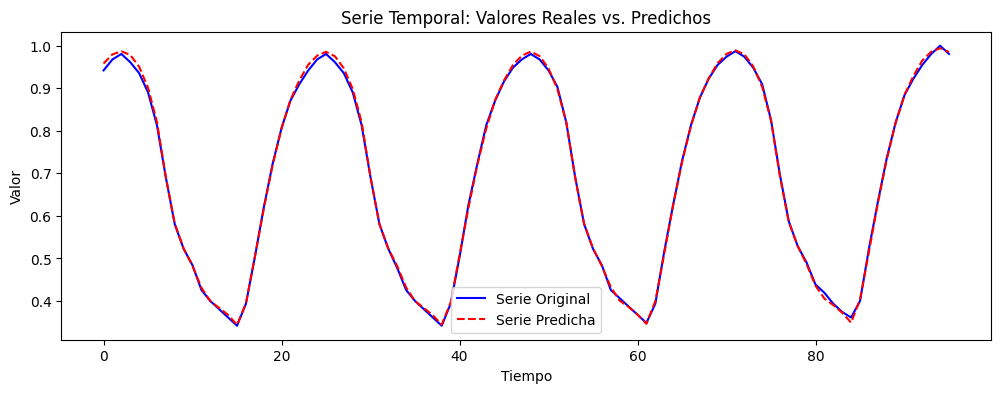

In [44]:

plt.figure(figsize=(12, 4))
plt.plot(y_test, label="Serie Original", color='blue')
plt.plot(y_pred, label="Serie Predicha", color='red', linestyle='dashed')
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Serie Temporal: Valores Reales vs. Predichos")
plt.legend()
plt.show()

La predicción con mi modelo optuna parece ser casi perfecta. Sin necesidad de hacer un búsqueda de hiperparametros tan exhaustiva creo que logré una casi perfecta :)

In [45]:

last_sequence = X_test[-1:]  

# 48 horas a predecir
n_steps_a_predecir = 48

predicciones = []

for _ in range(n_steps_a_predecir):
    # predicciones con el mejor modelo
    pred = best_model.predict(last_sequence)
    
    predicciones.append(pred[0, 0]) 

    last_sequence = np.roll(last_sequence, -1, axis=1)  
    last_sequence[0, -1] = pred  

predicciones = np.array(predicciones)

predicciones = scaler.inverse_transform(predicciones.reshape(-1, 1)).flatten()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━

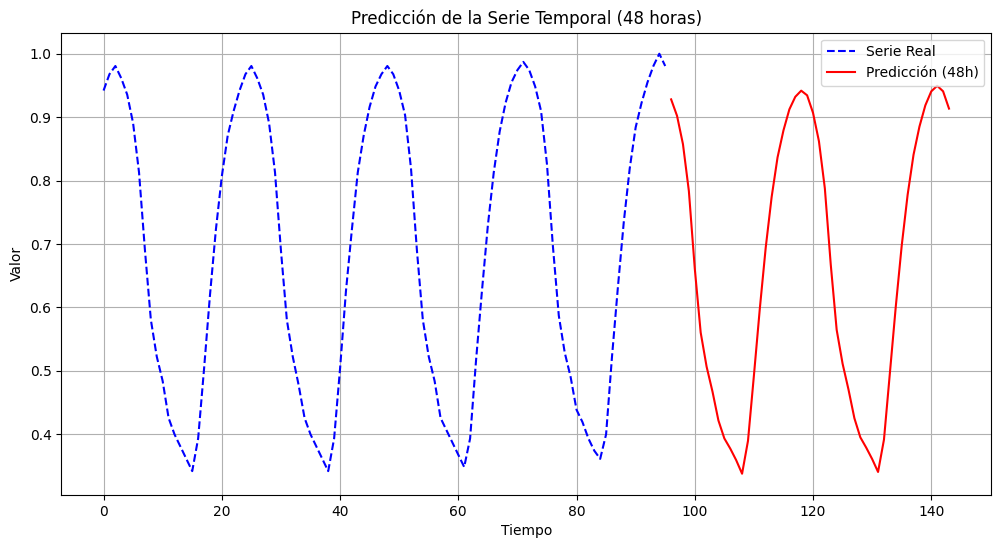

In [46]:
time_range = np.arange(len(y_test))  
future_range = np.arange(len(y_test), len(y_test) + 48) 

#original
plt.figure(figsize=(12, 6))
plt.plot(time_range, y_test, label="Serie Real", color="blue", linestyle="dashed")

# predicciones
plt.plot(future_range, predicciones, label="Predicción (48h)", color="red")

plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Predicción de la Serie Temporal (48 horas)")
plt.legend()
plt.grid()
plt.show()


### MLP1

In [38]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [39]:
n_steps = 24 #que vaya checando ppor dia

X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

In [40]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#datos de entrenamiento
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2846 - mean_absolute_percentage_error: 58477.4180 - mean_squared_error: 0.1274 - val_loss: 0.1160 - val_mean_absolute_percentage_error: 18.5678 - val_mean_squared_error: 0.0149
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0509 - mean_absolute_percentage_error: 13420.2480 - mean_squared_error: 0.0038 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 4.8606 - val_mean_squared_error: 0.0012
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 - mean_absolute_percentage_error: 112972.1875 - mean_squared_error: 7.3356e-04 - val_loss: 0.0182 - val_mean_absolute_percentage_error: 3.2827 - val_mean_squared_error: 4.7782e-04
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140 - mean_absolute_percentage_error: 13722.1260 - mean_squared_error: 3.3225e-04 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 2.3209 - val_mean_squared_error: 2.7374e-04
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 

In [42]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - mean_absolute_percentage_error: 2.1369 - mean_squared_error: 1.8302e-04
Test Loss: 0.01100325770676136
Test MAPE: 2.0793979167938232
Test MSE: 0.00017206768097821623


In [43]:
#  predicciones sobre prueba
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.92778903]
 [0.95896935]
 [0.9797734 ]
 [0.9841327 ]
 [0.9760072 ]]


<Axes: >

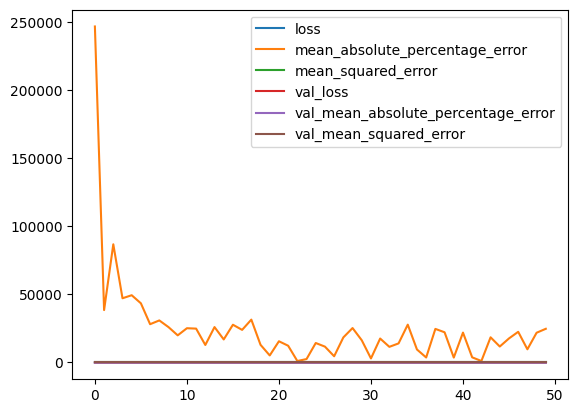

In [44]:
# Analizar función de pérdida
pd.DataFrame(history.history).plot()

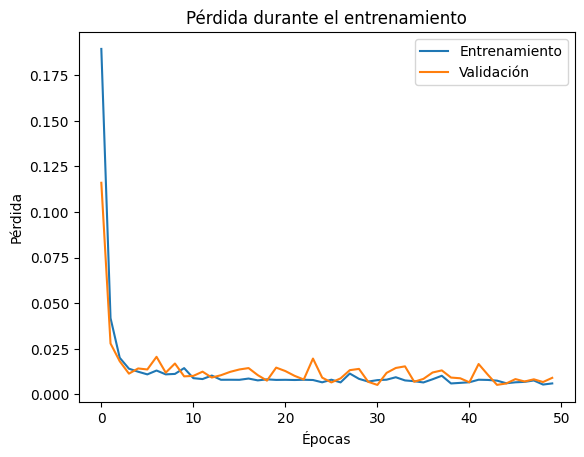

In [45]:
#ya que no se vio en la anterior
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



In [46]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.9967710921256395


In [47]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")
print("\nResultados de la evaluación del modelo en los datos de prueba:")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Puede indicar que el modelo no está siendo tan preciso. ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. Obtuve una r2 muy buena, casi perfecta al parecer")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales, pero podría mejorarse ajustando los parámetros o utilizando arquitecturas más complejas. Muy bueno :)")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Resultados de la evaluación del modelo en los datos de prueba:

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0110, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 2.0794, lo que significa que el error absoluto medio porcentual es del 2.0794%. Puede indicar que el modelo no está siendo tan preciso. 
- El Test MSE es 0.0002, lo qu

In [48]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), ya que le puse que fuera diario los n_steps
    
    #predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_35376/490346680.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


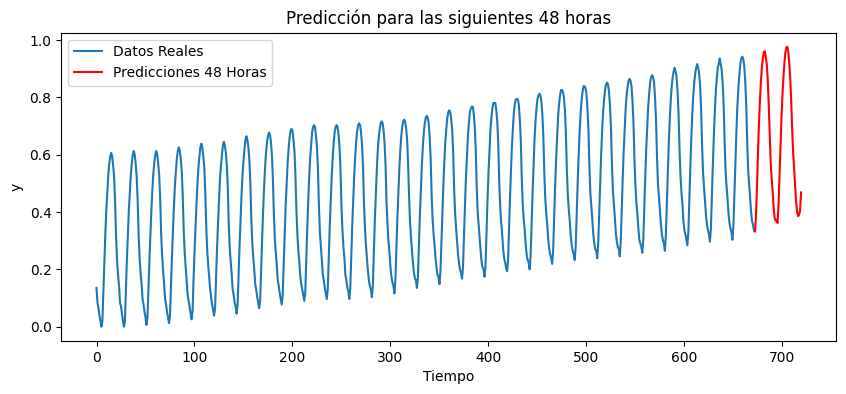

In [49]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


En efecto, las predicciones de mi modelo se ven muyyyy buenas. Los errores son muy bajos y la r2 dice que predice la variabilidad muy bien

### MLP 2

In [50]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='adam', 
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#agregar mas epocas
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5613 - mean_absolute_percentage_error: 136937.1875 - mean_squared_error: 0.4548 - val_loss: 0.2399 - val_mean_absolute_percentage_error: 52.3726 - val_mean_squared_error: 0.0881
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1522 - mean_absolute_percentage_error: 36612.1133 - mean_squared_error: 0.0400 - val_loss: 0.0538 - val_mean_absolute_percentage_error: 7.2875 - val_mean_squared_error: 0.0050
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382 - mean_absolute_percentage_error: 102055.4609 - mean_squared_error: 0.0024 - val_loss: 0.0186 - val_mean_absolute_percentage_error: 3.3990 - val_mean_squared_error: 4.9074e-04
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 - mean_absolute_percentage_error: 28193.1445 - mean_squared_error: 5.1030e-04 - val_loss: 0.0137 - val_mean_absolute_percentage_error: 2.3608 - val_mean_squared_error: 2.6426e-04
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━

In [52]:
# Evaluar con prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - mean_absolute_percentage_error: 0.8893 - mean_squared_error: 4.0355e-05
Test Loss: 0.005324568133801222
Test MAPE: 0.8848779201507568
Test MSE: 4.1203093132935464e-05


In [53]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.9169057 ]
 [0.94869345]
 [0.9660342 ]
 [0.976702  ]
 [0.9667809 ]]


In [54]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²: 0.9992268110356327


In [59]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%.  ")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. \n Es un error muy pequeño, por lo que el modelos esta haciendo buenas predicciones.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba.")
print("\nEl modelo tiene un rendimiento adecuado para la predicción de series temporales. No se como podria mejorar mas")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es Adam y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0053, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es relativamente bajo, lo que indica que el modelo tiene un buen rendimiento, ya que no está cometiendo errores grandes en sus predicciones.
- El Test MAPE es 0.8849, lo que significa que el error absoluto medio porcentual es del 0.8849%.  
- El Test MSE es 0.0000, lo que muestra el promedio de los errores cuadráticos. Un valor más bajo indica mejores predicciones. 
 Es un error muy peq

In [56]:
#último conjunto de datos de entrenamiento
last_sequence = train['y_scaled'].values[-n_steps:]  

#lista para almacenar las predicciones
predictions = []

#siguientes 48 horas
for _ in range(48): 
    input_seq = last_sequence.reshape((1, n_steps))  # Reshape para el modelo (1, 24), n steps es 24
    
    # Realizar la predicción para la siguiente hora
    next_pred = model1.predict(input_seq, verbose=0)
    
    # añadir a la lista
    predictions.append(next_pred[0, 0])
    
    # Actualizar la secuencia de entrada para la siguiente predicción
    last_sequence = np.roll(last_sequence, -1) 
    last_sequence[-1] = next_pred  



/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_35376/1190847045.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = next_pred


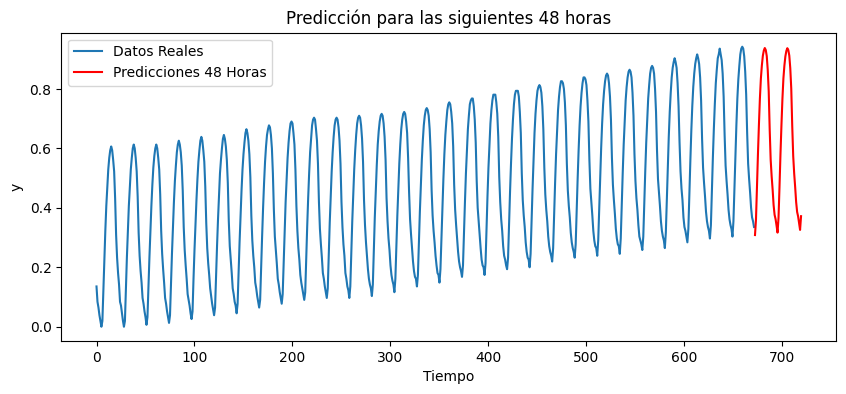

In [57]:
time_steps = np.arange(len(train), len(train) + 48)

plt.figure(figsize=(10, 4))
plt.plot(train.index, train['y_scaled'], label='Datos Reales')  
plt.plot(time_steps, predictions, label='Predicciones 48 Horas', color='red')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.title('Predicción para las siguientes 48 horas')
plt.show()


### MLP 3

In [58]:
n_steps = 24
model1 = keras.Sequential([
    keras.layers.Input(shape=(n_steps,)),  
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(1)
])

model1.compile(optimizer='SGD', #cambie de optimizador para ver como da
               loss='mae', 
               metrics=[tf.metrics.MeanAbsolutePercentageError(), tf.metrics.MeanSquaredError()])

model1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# 200 epocas
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1728 - mean_absolute_percentage_error: 80328.9844 - mean_squared_error: 0.0462 - val_loss: 0.0554 - val_mean_absolute_percentage_error: 10.8712 - val_mean_squared_error: 0.0044
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0408 - mean_absolute_percentage_error: 122603.6016 - mean_squared_error: 0.0025 - val_loss: 0.0396 - val_mean_absolute_percentage_error: 7.0120 - val_mean_squared_error: 0.0018
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0430 - mean_absolute_percentage_error: 220979.9219 - mean_squared_error: 0.0024 - val_loss: 0.1023 - val_mean_absolute_percentage_error: 17.4307 - val_mean_squared_error: 0.0108
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0468 - mean_absolute_percentage_error: 45627.1289 - mean_squared_error: 0.0029 - val_loss: 0.0164 - val_mean_absolute_percentage_error: 2.5817 - val_mean_squared_error: 4.5183e-04
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [61]:
# Evaluar el modelo con los datos de prueba
test_loss, test_mape, test_mse = model1.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAPE: {test_mape}")
print(f"Test MSE: {test_mse}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0411 - mean_absolute_percentage_error: 6.3216 - mean_squared_error: 0.0018
Test Loss: 0.03984171152114868
Test MAPE: 6.172595024108887
Test MSE: 0.001744898152537644


In [62]:
predictions = model1.predict(X_test)

print(predictions[:5])  #ver 5 pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0.9676907]
 [0.9936255]
 [1.0218441]
 [1.0259876]
 [1.0169044]]


In [63]:
predictions = model1.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R²: {r2}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R²: 0.9672563997962127


Bajo un poco la r2 de este modelo, pero sigue siendo bastante bueno.

In [64]:
print("Arquitectura del modelo:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).")
print("2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.")
print("El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El Test Loss (MAE) es {test_loss:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.")
print(f"- El Test MAPE es {test_mape:.4f}, lo que significa que el error absoluto medio porcentual es del {test_mape:.4f}%. Este valor es relativamente alto en comparación con el modelo anterior, lo que indica que el modelo no es tan preciso.")
print(f"- El Test MSE es {test_mse:.4f}, lo que muestra el promedio de los errores cuadráticos. A pesar de que este valor es bajo, es un poco más alto que en el modelo anterior, lo que también sugiere que el rendimiento en las predicciones es ligeramente inferior.")
print(f"- El R²: es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. Aunque este valor sigue siendo bueno, no es tan alto como el obtenido en el modelo con Adam, lo que refleja que el modelo no explica tanto de la variabilidad de los datos.")
print("\nAunque el rendimiento no es tan bueno como el modelo anterior con Adam, sigue siendo bastante adecuado para la predicción de series temporales. El uso de SGD en lugar de Adam como optimizador podría estar influyendo en el rendimiento algo inferior. Sin embargo, el modelo aún muestra un rendimiento aceptable y podría mejorarse con ajustes en el optimizador y otros parámetros.")


Arquitectura del modelo:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas).
2. Capa densa oculta: Tiene 100 neuronas con activación ReLU para aprender representaciones no lineales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas, con un tamaño de batch de 32.
El optimizador usado es SGD (Descenso de Gradiente Estocástico) y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El Test Loss (MAE) es 0.0398, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Este valor es razonablemente bajo, pero ligeramente más alto en comparación con el modelo anterior, lo que sugiere que el modelo con SGD no tiene el mismo rendimiento eficiente que el modelo con Adam.
- El Test MAPE es 6.1726, lo que significa que el error absoluto medio porcentual es del 6.1726%. Este valor es relativamente alto en comparación con el modelo ante

## Optuna MLP

In [47]:
def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 3)  # Número de capas ocultas (1 a 3)
    units = trial.suggest_int("units", 32, 256)  # Neuronas por capa (32 a 256)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)  
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])  

    # Definir el modelo MLP
    model = keras.Sequential()
    model.add(Input(shape=(n_steps,))) 
    
    for _ in range(n_layers):
        model.add(Dense(units=units, activation='relu')) 
    
    model.add(Dense(1))  

    # Compilar el modelo
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mae')

    # Entrenar el modelo con validación
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val), 
                        verbose=0)

   
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    
    return val_loss  # Optuna minimizará el MAE



In [51]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30) 

print("Mejores Hiperparámetros:", study.best_trial.params)

[I 2025-04-03 11:45:43,833] A new study created in memory with name: no-name-ef340fd2-8035-4aed-b613-e1ece17c935b
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/770725150.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2025-04-03 11:45:47,174] Trial 0 finished with value: 0.006243872921913862 and parameters: {'n_layers': 2, 'units': 87, 'learning_rate': 0.00038570189324387656, 'batch_size': 64}. Best is trial 0 with value: 0.006243872921913862.
[I 2025-04-03 11:45:50,568] Trial 1 finished with value: 0.008756333030760288 and parameters: {'n_layers': 1, 'units': 207, 'learning_rate': 0.0003601295713623874, 'batch_size': 32}. Best is trial 0 with value: 0.006243872921913862.
[I 2025-04-03 11:45:54,367] Trial 2 finished with value: 0.011

Mejores Hiperparámetros: {'n_layers': 2, 'units': 222, 'learning_rate': 0.0010702106707161359, 'batch_size': 64}


In [52]:
# Obtener los mejores hiperparámetros encontrados por Optuna
best_params = study.best_trial.params

best_model = keras.Sequential()
best_model.add(Input(shape=(n_steps,)))  # Capa de entrada

for _ in range(best_params["n_layers"]):
    best_model.add(Dense(best_params["units"], activation='relu'))  # Capas ocultas

best_model.add(Dense(1))  # Capa de salida



In [53]:
best_optimizer = keras.optimizers.Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mae')

best_model.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)), 
               epochs=200, batch_size=best_params["batch_size"], verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("MAE en test:", test_loss)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3678  
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 
Epoch 14/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 15/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [54]:
y_pred = best_model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.0188
RMSE: 0.0200
R²: 0.9925


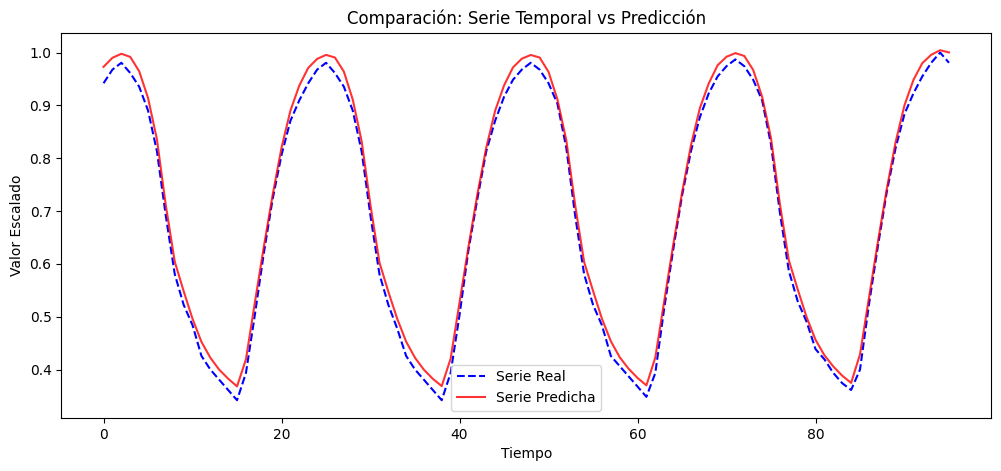

In [55]:
plt.figure(figsize=(12, 5))

#real
plt.plot(y_test, label="Serie Real", linestyle="dashed", color='blue')

#predicha
plt.plot(y_pred, label="Serie Predicha", alpha=0.8, color='red')

plt.title("Comparación: Serie Temporal vs Predicción")
plt.xlabel("Tiempo")
plt.ylabel("Valor Escalado")
plt.legend()
plt.show()


### LSTM 1

In [65]:
# que sea diario
n_steps = 24

# Aplicar la función
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

# Redimensionar para la entrada del LSTM (samples, timesteps, features)
n_features = 1  # Solo tengo una variable
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))


In [66]:
# Definir el modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, n_features)),  # Capa LSTM
    Dense(1)  # Capa de salida
])

/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model_lstm.compile(optimizer='adam', loss='mse')

In [68]:
model_lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Entrenar el modelo con 50 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=50, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1536 - val_loss: 0.0528
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0436 - val_loss: 0.0258
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0210 - val_loss: 0.0031
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - val_loss: 0.0306
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0067
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3694e-04 - val_loss: 0.0013
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6544e-04 - val_loss: 0.0015
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6711e

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


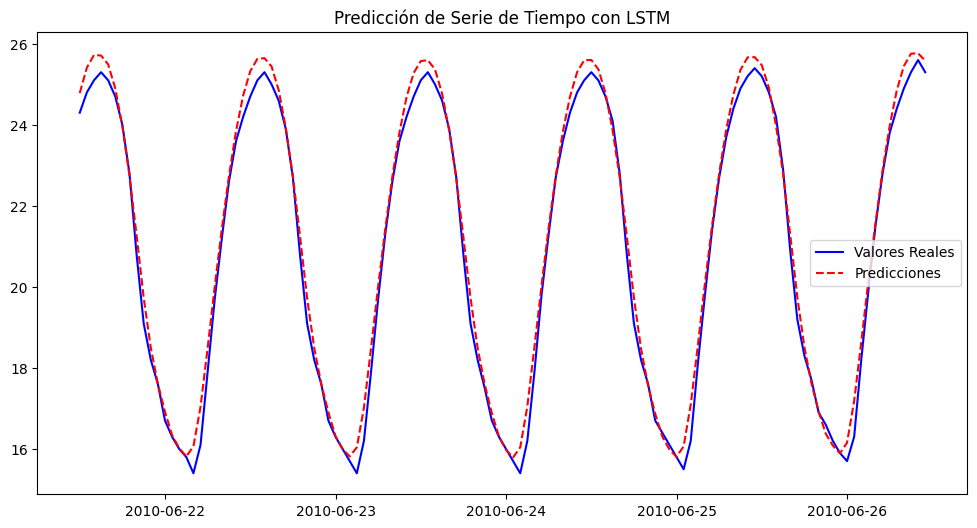

In [70]:
y_pred = model_lstm.predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.title("Predicción de Serie de Tiempo con LSTM")
plt.show()

In [71]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9885
MAE: 0.3070
RMSE: 0.3839


<Axes: >

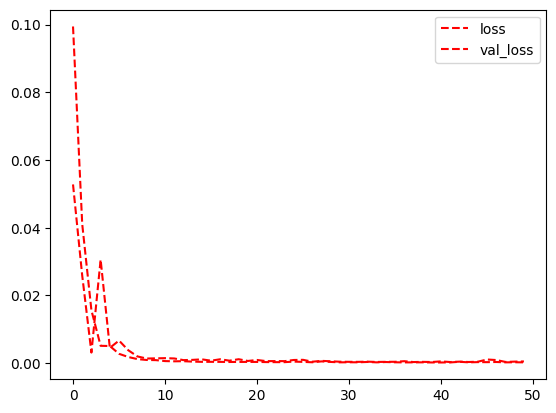

In [72]:
pd.DataFrame(history.history).plot(style='r--')

In [73]:
print("Arquitectura del modelo LSTM:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.")
print("2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.")
print("3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.")
print(f"- El MAE es {mae:.4f}, lo que indica el error promedio absoluto entre las predicciones y los valores reales. \n Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue siendo aceptable.")
print(f"- El RMSE es {rmse:.4f}, lo que muestra el promedio de los errores cuadráticos. Un valor más alto en comparación con otros modelos puede indicar que las predicciones tienen una mayor dispersión.")
print("\nEn general, el modelo LSTM está funcionando bastante bien, con un buen R² que indica que está capturando la variabilidad en los datos. El MAE y el RMSE son más altos en comparación con el modelo con las redes densas, lo que podría indicar que hay margen de mejora en la arquitectura o los parámetros del modelo. A pesar de esto, el modelo LSTM es una opción sólida para predicciones de series temporales.")


Arquitectura del modelo LSTM:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo (ventana de 24 horas) y las características (n_features) de los datos.
2. Capa LSTM: Con 50 unidades y activación ReLU, para aprender las dependencias temporales en los datos secuenciales.
3. Capa de salida: Predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 50 épocas, con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9885, lo que indica que el modelo explica un 98.85% de la variabilidad de los datos de prueba. 
 Este valor es bastante bueno, lo que significa que el modelo es capaz de capturar una gran parte de la variabilidad de los datos.
- El MAE es 0.3070, lo que indica el error promedio absoluto entre las predicciones y los valores reales. 
 Aunque este valor es relativamente alto, dado el tipo de problema y el modelo LSTM, el resultado sigue

### LSTM 2

In [74]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='relu', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='relu'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [75]:
model_lstm.compile(optimizer='adam', loss='mse')

In [76]:
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
#aumentar a 200 epocas
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)


Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2016 - val_loss: 0.0823
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0553 - val_loss: 0.0579
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0467 - val_loss: 0.0142
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - val_loss: 0.0165
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0536
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - val_loss: 0.0118
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 0.0070
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0171
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0068
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x153f47a60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


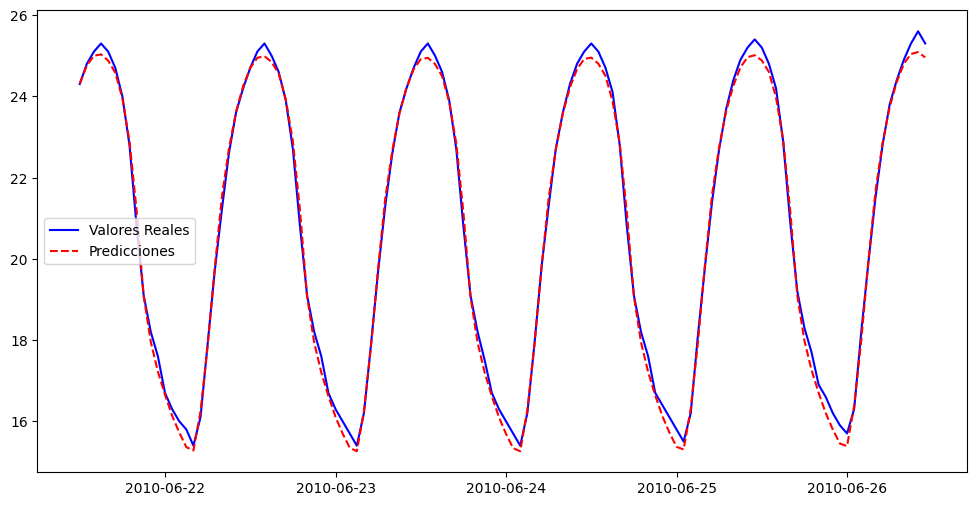

In [78]:
y_pred = model_lstm  .predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_test_rescaled)], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_pred_rescaled)], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()
plt.show()


In [79]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9961
MAE: 0.1804
RMSE: 0.2232


<Axes: >

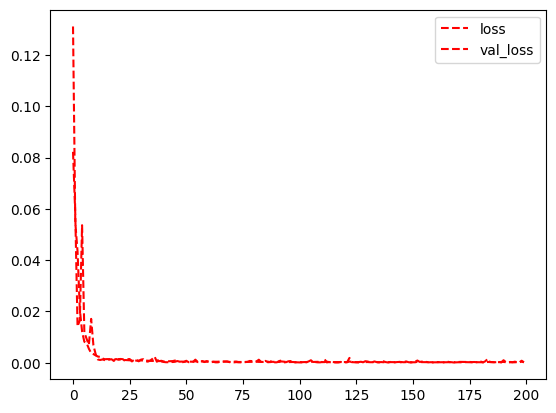

In [80]:
pd.DataFrame(history.history).plot(style='r--')

Este modelo tuvo mejores resultados, por lo que con este haré predicciones.

In [81]:
# ultima secuencia de la serie
input_seq = test[['y_scaled']].iloc[-n_steps:].values

# Reshape para la entrada del modelo
input_seq = input_seq.reshape((1, n_steps, 1))  



In [82]:
# Predecir el siguiente
predictions = []

for i in range(48):  # 48 horas a predecir
    pred = model_lstm.predict(input_seq, verbose=0)
    
    # guardar la predicción
    predictions.append(pred[0, 0])
    
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)


In [83]:
predictions_rescaled = scaler_minmax.inverse_transform(np.array(predictions).reshape(-1, 1)) #quito el escalado

# Generar las predicciones con el tiempo correspondiente
future_times = pd.date_range(start=test['time'].iloc[-1], periods=49, freq='H')[1:]

forecast_df = pd.DataFrame({
    'time': future_times,
    'predicted': predictions_rescaled.flatten()
})


/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_35376/3462485409.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_times = pd.date_range(start=test['time'].iloc[-1], periods=49, freq='H')[1:]


In [85]:
#revertir el escalado de los valores reales también
y_real_rescaled = scaler_minmax.inverse_transform(df_h174['y_scaled'].values.reshape(-1, 1))


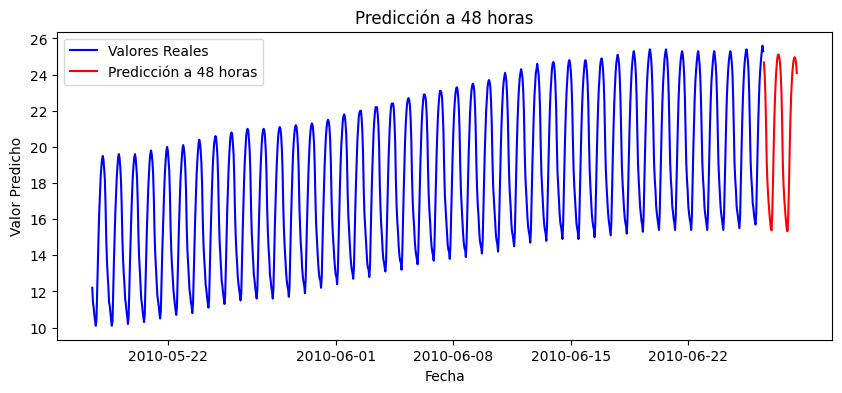

In [87]:
plt.figure(figsize=(10, 4))

#valores reales
plt.plot(df_h174['time'], y_real_rescaled, label='Valores Reales', color='blue')

#pred
plt.plot(forecast_df['time'], forecast_df['predicted'], label='Predicción a 48 horas', color='red')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor Predicho')
plt.title('Predicción a 48 horas')
plt.show()


In [88]:
print("Arquitectura del modelo LSTM mejorado:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor sugiere que el modelo ha capturado bien la estructura de los datos.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Este valor es clave para evaluar la precisión del modelo.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. Un valor más bajo indicaría predicciones más precisas.")

print("\nEl modelo con dos capas LSTM y más épocas de entrenamiento muestra mejoras en la capacidad de aprendizaje de las relaciones temporales. \nSin embargo, aún se puede optimizar ajustando hiperparámetros como la cantidad de neuronas, dropout o la tasa de aprendizaje.")  


Arquitectura del modelo LSTM mejorado:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación ReLU, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para evitar sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación ReLU, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9961, lo que indica que el modelo explica un 99.61% de la variabilidad de los datos de prueba. 
 Este valor sugiere que el modelo ha capturado bien la estructura de los datos.
- El MA

### LSTM 3

In [89]:
model_lstm = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    LSTM(50, activation='tanh', return_sequences=True),  # Primera capa LSTM con return_sequences=True
    Dropout(0.2),  # Regularización
    LSTM(30, activation='tanh'),  # Segunda capa LSTM
    Dense(1)  # Capa de salida
])

In [90]:
model_lstm.compile(optimizer='adam', loss='mse')

In [91]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
history = model_lstm.fit(
    X_train, y_train, 
    epochs=200, batch_size=16, 
    validation_data=(X_val, y_val)
)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1056 - val_loss: 0.0493
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0447 - val_loss: 0.0237
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - val_loss: 0.0026
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 7.2737e-04
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


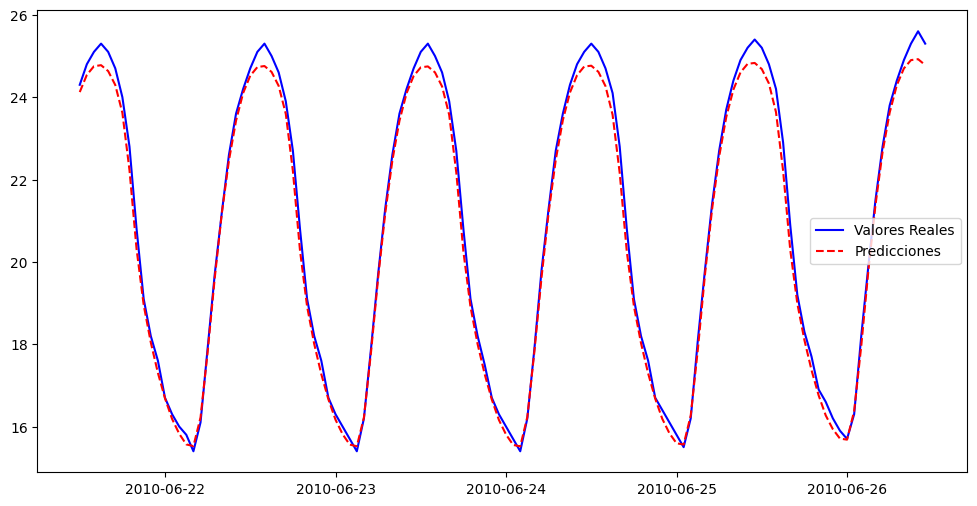

In [93]:
y_pred = model_lstm  .predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_rescaled = scaler_minmax.inverse_transform(y_pred)
y_test_rescaled = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_test_rescaled)], y_test_rescaled, label="Valores Reales", color="blue")
plt.plot(test['time'].iloc[n_steps:n_steps+len(y_pred_rescaled)], y_pred_rescaled, label="Predicciones", color="red", linestyle="dashed")
plt.legend()

In [94]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(np.mean((y_test_rescaled - y_pred_rescaled) ** 2))


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9925
MAE: 0.2591
RMSE: 0.3102


<Axes: >

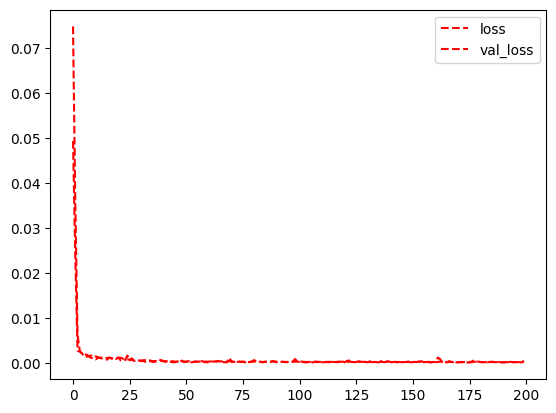

In [95]:
pd.DataFrame(history.history).plot(style='r--')

In [96]:
print("Arquitectura del modelo LSTM con activación tanh:")
print("1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).")
print("2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. \n   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.")
print("3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.")
print("4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.")
print("5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.")
print("El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.")
print("El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).")


print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Este valor es más bajo que en modelos anteriores, lo que sugiere que el modelo no captura tan bien los patrones temporales.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n Un valor más alto que en modelos previos indica que este modelo comete más errores en sus predicciones.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n Un valor más alto que en modelos anteriores sugiere que las predicciones son menos precisas.")

print("\nA pesar de entrenarse durante 200 épocas, este modelo no tuvo un mejor desempeño que los anteriores. \nEl uso de la activación tanh no proporcionó mejores resultados y, en general, el modelo es menos preciso. \nSe recomienda probar con otros ajustes, como diferentes tasas de aprendizaje, más unidades en las capas LSTM, o incluso un modelo basado en CNN+LSTM.")  


Arquitectura del modelo LSTM con activación tanh:
1. Capa de entrada: Recibe secuencias de 24 pasos de tiempo con múltiples características (n_features).
2. Primera capa LSTM: Con 50 unidades y activación tanh, aprende dependencias temporales en los datos. 
   Usa return_sequences=True para pasar las secuencias completas a la siguiente capa.
3. Capa Dropout: Aplica un 20% de regularización para reducir el sobreajuste.
4. Segunda capa LSTM: Con 30 unidades y activación tanh, refina la representación secuencial de los datos.
5. Capa de salida: Una capa densa que predice el valor de la siguiente hora en la secuencia.
El modelo fue entrenado durante 200 épocas con un tamaño de batch de 32.
El optimizador utilizado es Adam, y la función de pérdida es MAE (Error Absoluto Medio).

Interpretación de los resultados:
- El R² es 0.9925, lo que indica que el modelo explica un 99.25% de la variabilidad de los datos de prueba. 
 Este valor es más bajo que en modelos anteriores, lo que sugiere que el

## Optuna LSTM

### CNN-LSTM 1

In [58]:
def objective(trial):
    n_units_lstm1 = trial.suggest_int("n_units_lstm1", 32, 128)
    n_units_lstm2 = trial.suggest_int("n_units_lstm2", 16, 64)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # modelo LSTM
    model = Sequential([
        LSTM(n_units_lstm1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
        Dropout(dropout_rate),
        LSTM(n_units_lstm2, activation='relu'),
        Dense(1)
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val),
                        verbose=0)  

    # Evaluar el modelo
    loss = model.evaluate(X_val, y_val, verbose=0)
    return loss  # Queremos minimizar la pérdida MSE

In [59]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  


[I 2025-04-03 11:54:14,058] A new study created in memory with name: no-name-cf5cc0f7-a43f-4290-84d9-1cfb74296ce8
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/2932380419.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/Users/maripau/Desktop/ITESO/No lineales/EXAMEN2/examen2_venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[I 2025-04-03 11:54:43,686] Trial 0 finished with value: 0.000542048888746649 and parameters: {'n_units_lstm1': 107, 'n_units_lstm2': 42, 'dropout_rate': 0.40570732790847797, 'batch_size': 6

In [60]:
best_params = study.best_params
print("Mejores Hiperparámetros:", best_params)


Mejores Hiperparámetros: {'n_units_lstm1': 98, 'n_units_lstm2': 43, 'dropout_rate': 0.2171301411257193, 'batch_size': 16, 'learning_rate': 0.0012760187225543244}


In [61]:
best_model = Sequential([
    LSTM(best_params["n_units_lstm1"], activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(best_params["dropout_rate"]),
    LSTM(best_params["n_units_lstm2"], activation='relu'),
    Dense(1)
])

# modelo con mejores hiperparametros
best_optimizer = Adam(learning_rate=best_params["learning_rate"])
best_model.compile(optimizer=best_optimizer, loss='mse')

# Entrenar el modelo 
best_model.fit(X_train, y_train, 
               epochs=100, batch_size=best_params["batch_size"], 
               validation_data=(X_val, y_val),
               verbose=1)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1418 - val_loss: 0.0731
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0553 - val_loss: 0.0576
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0426 - val_loss: 0.0215
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0121 - val_loss: 0.0310
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0077
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - val_loss: 9.9742e-04
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

In [62]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Agregamos la dimensión de features

# Evaluar el modelo corregido
test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print("MSE en Test:", test_loss)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5473e-04  
MSE en Test: 0.0001599721726961434


In [63]:
# Generar predicciones en test
y_pred = best_model.predict(X_test)

# Desescalar si fue escalado
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Si usaste MinMaxScaler

# Desescalar y_test
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)) 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [64]:
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.9970
MAE: 0.0089


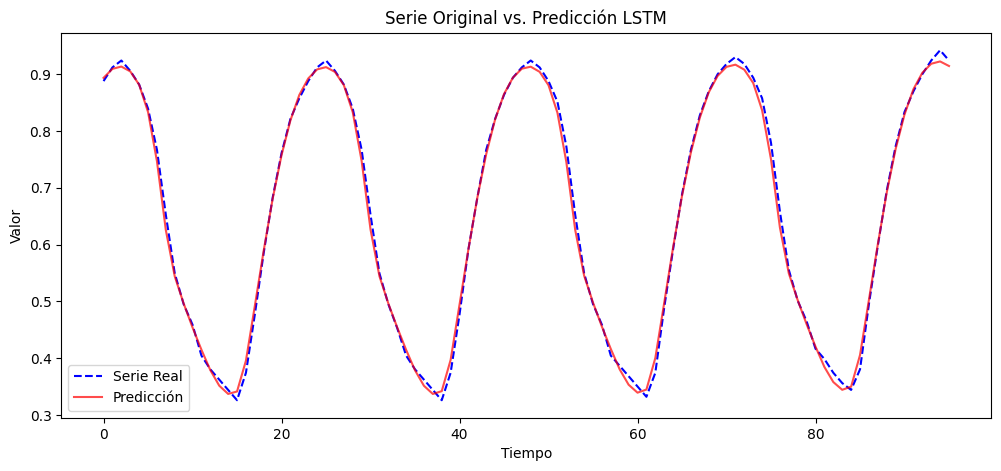

In [65]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled, label="Serie Real", linestyle="dashed", color="blue")
plt.plot(y_pred_rescaled, label="Predicción", alpha=0.7, color="red")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Serie Original vs. Predicción LSTM")
plt.legend()
plt.show()

In [66]:
last_sequence = X_test[-1].reshape(1, n_steps, 1)  # Redimensionamos 

for _ in range(48):
    next_pred = best_model.predict(last_sequence)  # Predecimos el siguiente valor
    future_predictions.append(next_pred[0, 0])  # guardar pred
    
    # actualizar valores
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred[0, 0]]]], axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)

future_predictions_rescaled = scaler.inverse_transform(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [67]:
print(future_predictions_rescaled.shape)  # Debe ser (48,) o (48,1)
future_predictions_rescaled = future_predictions_rescaled[:48]


(48, 1)


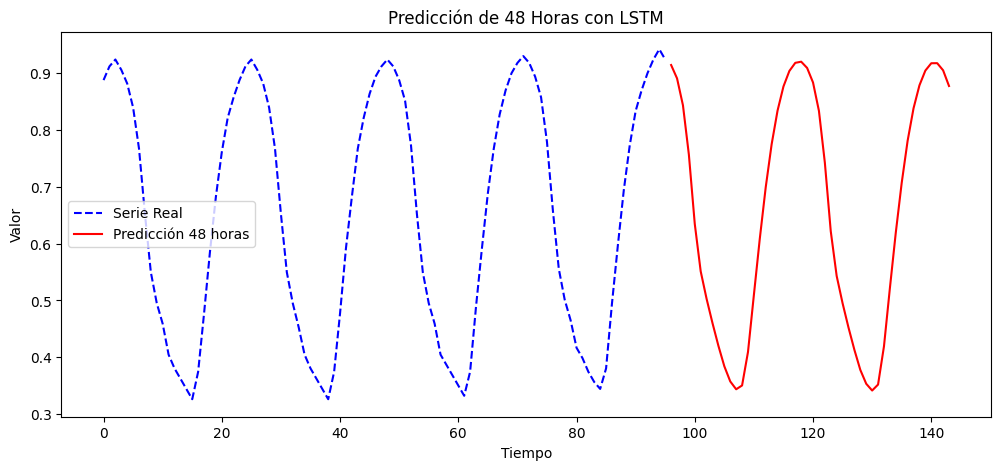

In [68]:
plt.figure(figsize=(12, 5))

# original
plt.plot(y_test_rescaled, label="Serie Real", linestyle="dashed", color="blue")

# prediccion
plt.plot(range(len(y_test_rescaled), len(y_test_rescaled) + 48), future_predictions_rescaled, label="Predicción 48 horas", color="red")

plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Predicción de 48 Horas con LSTM")
plt.legend()
plt.show()

Con mi modelo de optuna, obtuve una r2 bastante satisfactoria, al igual que un rmse bajo. Parece ser que el modelo no comete muchos errores al hacer predicciones. Los valores reales vs los predichos se ven bastante bien, y parace que se ajustan de buena manera. Al mismo tiempo, las predicciones parecen hacerse de buena manera, y parecen replicar de manera correcta la estacionalidad.

## CNN-LSTM

In [69]:
n_steps = 24
n_seq = 2  # Número de sub-secuencias
n_features = 1  # Solo 1 variable

def reshape_for_cnn_lstm(X, n_seq, n_steps, n_features):
    X = X.reshape((X.shape[0], n_seq, n_steps // n_seq, n_features))
    return X

# Crear secuencias con tu función
X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)

# Ajustar la forma para el modelo CNN + LSTM
X_train = reshape_for_cnn_lstm(X_train, n_seq, n_steps, n_features)
X_val = reshape_for_cnn_lstm(X_val, n_seq, n_steps, n_features)
X_test = reshape_for_cnn_lstm(X_test, n_seq, n_steps, n_features)


In [70]:
model_cnnlstm1 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)
])

In [71]:
model_cnnlstm1.compile(optimizer='RMSprop', loss='mse')

In [72]:
model_cnnlstm1.summary()

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 2, 12, 64)      │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 2, 6, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 2, 384)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 50)             │        87,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,179 (340.54 KB)

 Trainable params: 87,179 (340.54 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model_cnnlstm1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1323 - val_loss: 0.0488
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0407 - val_loss: 0.0335
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 - val_loss: 0.0206
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - val_loss: 0.0146
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0026
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0077
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0156
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

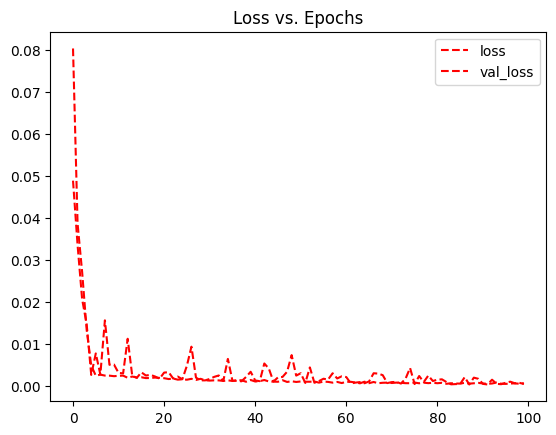

In [74]:
# Visualizar la pérdida durante el entrenamiento
pd.DataFrame(history.history).plot(style='r--')
plt.title("Loss vs. Epochs")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


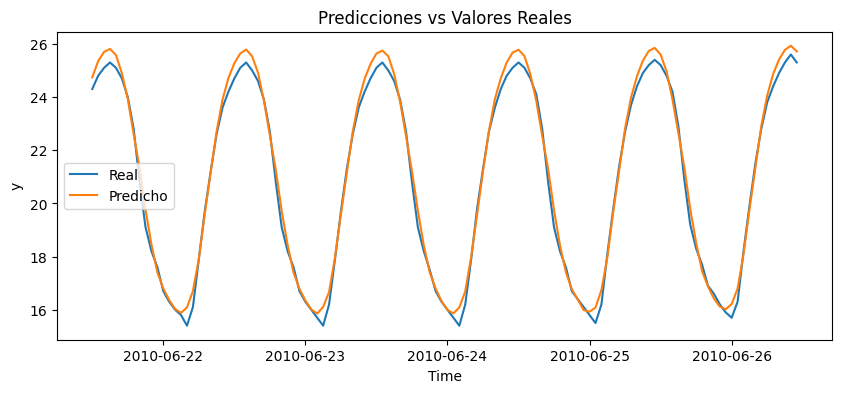

In [75]:
# Predicciones
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h174['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h174['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [76]:
y_pred = model_cnnlstm1.predict(X_test)

# Desescalar los valores
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score: 0.9898
RMSE: 0.3612
MAE: 0.3001


In [77]:
print("Arquitectura del modelo CNN-LSTM con activación ReLU:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.")
print("2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. \n   Extrae patrones espaciales en cada sub-secuencia de la entrada.")
print("3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, \n   permitiendo que la LSTM procese solo la información más relevante.")
print("4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.")
print("5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.")
print("6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba. \n Es bastante bueno")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n creo wue es un buen resultado")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n No es un Rmse muy grande, por lo que no penaliza tanto los errores")

print("\nConclusiones:")
print("Este modelo CNN-LSTM combina la capacidad de la CNN para extraer patrones locales con la capacidad de la LSTM para capturar dependencias temporales.")
print("El resultado fue bueno, pero si quisiera mejorar podria hacer lo siguiente:")
print("  - Aumentar el número de filtros en Conv1D o agregar más capas convolucionales.")
print("  - Ajustar la cantidad de unidades en la LSTM o agregar una segunda capa LSTM.")
print("  - Cambiar la función de activación a tanh o probar con diferentes optimizadores como Adam.")


Arquitectura del modelo CNN-LSTM con activación ReLU:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias de 'n_steps//n_seq' pasos de tiempo, cada una con 'n_features' características.
2. Capa TimeDistributed Conv1D: Aplica una convolución de 1D con 64 filtros y activación ReLU. 
   Extrae patrones espaciales en cada sub-secuencia de la entrada.
3. Capa TimeDistributed MaxPooling1D: Reduce la dimensionalidad de las características aprendidas por la convolución, 
   permitiendo que la LSTM procese solo la información más relevante.
4. Capa TimeDistributed Flatten: Aplana las características extraídas para que puedan ser procesadas por la LSTM.
5. Capa LSTM: Con 50 unidades y activación ReLU, modela la dependencia temporal de los datos después de la extracción de características.
6. Capa de salida: Una capa densa con una sola neurona que predice el valor futuro de la serie temporal.
El modelo fue entrenado durante 100 épocas con el optimizador RMSprop y función de 

### CNN-LSTM 2

In [78]:
model_cnnlstm2 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps // n_seq, n_features)),
    
    # Primera capa Conv1D
    TimeDistributed(Conv1D(128, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),  # Dropout para regularización
    
    # Segunda capa Conv1D
    TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same')),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Dropout(0.3)),
    
    # Aplanar los datos para la capa LSTM
    TimeDistributed(Flatten()),
    
    # Capa LSTM con regularización
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.4),
    
    # Otra capa LSTM
    LSTM(32, activation='relu'),
    Dropout(0.4),
    
    # Capa densa de salida
    Dense(1)
])

In [79]:
model_cnnlstm2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [80]:
model_cnnlstm2.summary()

Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 2, 12, 128)     │           512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 2, 6, 128)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 2, 6, 64)       │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 2, 3, 64)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 2, 192)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 2, 64)          │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_64 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,393 (403.88 KB)

 Trainable params: 103,393 (403.88 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model_cnnlstm2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1923 - val_loss: 0.1103
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0681 - val_loss: 0.0425
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0583 - val_loss: 0.0433
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0530 - val_loss: 0.0299
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0489 - val_loss: 0.0212
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - val_loss: 0.0071
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - val_loss: 0.0167
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 - val_loss: 0.0070
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0201 - val_loss: 0.0029
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0058
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_loss: 0.0013
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


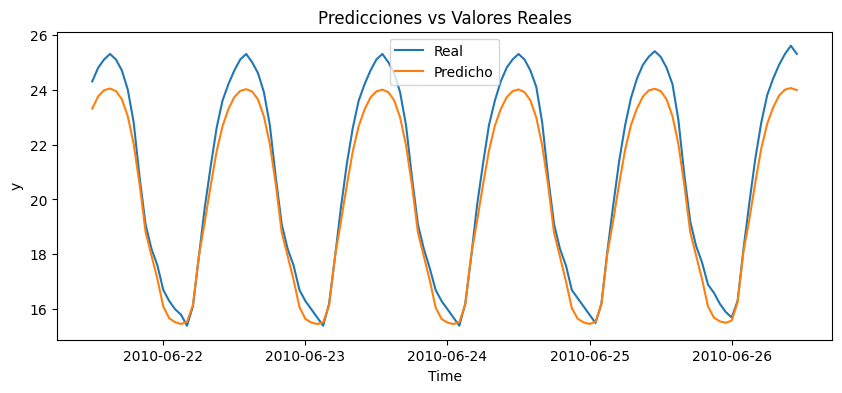

In [82]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h174['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h174['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [83]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9498
RMSE: 0.8015
MAE: 0.6996


In [84]:
print("Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:")
print("1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.")
print("2. Primer bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.")
print("   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.")
print("3. Segundo bloque Conv1D:")
print("   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.")
print("   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.")
print("   - TimeDistributed Dropout: Aplica otro 30% de regularización.")
print("4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.")
print("5. Bloque LSTM:")
print("   - Primera capa LSTM: Con 64 unidades y activación ReLU, emplea return_sequences=True para mantener la secuencia, seguida de un Dropout del 40%.")
print("   - Segunda capa LSTM: Con 32 unidades y activación ReLU, seguida de un Dropout del 40% para mayor regularización.")
print("6. Capa de salida: Una capa Dense con una sola neurona que predice el valor futuro de la serie temporal.")
print("El modelo fue entrenado durante 100 épocas utilizando el optimizador Adam (learning_rate=0.001) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nInterpretación de los resultados:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica aproximadamente {r2*100:.2f}% de la variabilidad de los datos de prueba. \n  Fue casi igual al anterior")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio entre las predicciones y los valores reales. \n   ")
print(f"- El RMSE es {rmse:.4f}, que mide la dispersión de los errores. \n  No es demasiado grande el rmse")
print("\nConclusiones:")
print("Este modelo combina bloques convolucionales para la extracción de características con capas LSTM para capturar dependencias temporales, junto con técnicas de regularización (Dropout) para evitar el sobreajuste.")
print("Fueron muy parecidos los resultados al anterior, se recomienda ajustar hiperparámetros, modificar el número de filtros o unidades LSTM, o experimentar con diferentes tasas de Dropout.")


Arquitectura del modelo CNN-LSTM con regularización y dos bloques Conv1D:
1. Capa de entrada: Recibe secuencias divididas en 'n_seq' sub-secuencias, cada una con 'n_steps // n_seq' pasos y 'n_features' características.
2. Primer bloque Conv1D:
   - TimeDistributed Conv1D: Con 128 filtros, kernel_size=3, activación ReLU y padding='same', extrae características locales.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size de 2.
   - TimeDistributed Dropout: Aplica un 30% de regularización para mitigar el sobreajuste.
3. Segundo bloque Conv1D:
   - TimeDistributed Conv1D: Con 64 filtros, kernel_size=3, activación ReLU y padding='same', profundiza en la extracción de características.
   - TimeDistributed MaxPooling1D: Nuevamente reduce la dimensionalidad con pool_size=2.
   - TimeDistributed Dropout: Aplica otro 30% de regularización.
4. Aplanamiento: TimeDistributed Flatten para convertir las salidas convolucionales en vectores adecuados para la LSTM.
5. Bloque LS

### CNN-LSTM 3

In [85]:
model_cnnlstm3 = Sequential([
    keras.layers.Input(shape=(n_seq, n_steps//n_seq, n_features)),
    TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')),
    TimeDistributed(MaxPooling1D(pool_size=n_seq)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(64, activation='relu'), 
    Dense(1)
])


In [86]:
model_cnnlstm3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [87]:
history = model_cnnlstm3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0858 - val_loss: 0.0556
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0160
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4160e-04 - val_loss: 8.5978e-04
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6957e-04 - val_loss: 0.0016
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1694e-04 - val_loss: 0.0011
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4063e-04 - val_loss: 0.0018
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3891e-04 - val_loss: 0.0013
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6815e-04 - val_loss: 0.0022
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


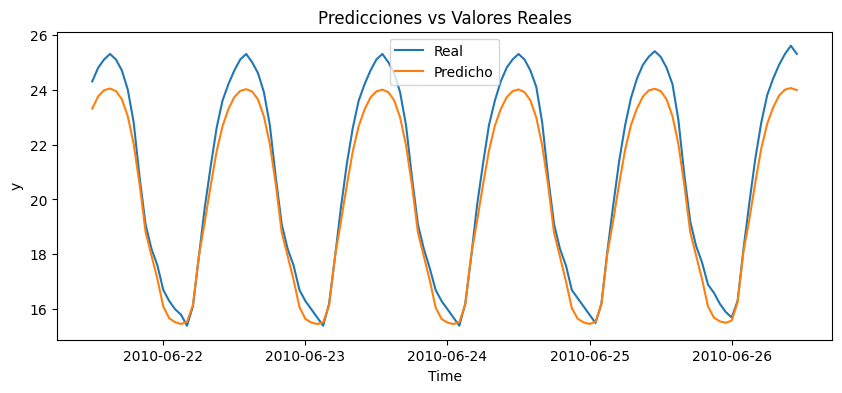

In [88]:
# Predicciones
y_pred = model_cnnlstm2.predict(X_test)

# Desescalar las predicciones
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

# Graficar resultados
plt.figure(figsize=(10, 4))
plt.plot(df_h174['time'].iloc[-len(y_test):], y_test_original, label='Real')
plt.plot(df_h174['time'].iloc[-len(y_test):], y_pred_original, label='Predicho')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


In [89]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9498
RMSE: 0.8015
MAE: 0.6996


In [90]:
print("Arquitectura del modelo CNN-LSTM con capa densa adicional:")
print("1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).")
print("2. Bloque CNN:")
print("   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.")
print("   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.")
print("   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.")
print("3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.")
print("4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.")
print("5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.")
print("El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).")

print("\nResultados del modelo CNN-LSTM con 200 épocas:")
print(f"- El R² es {r2:.4f}, lo que indica que el modelo explica un {r2*100:.2f}% de la variabilidad de los datos de prueba, \n   mostrando un buen ajuste y capacidad de predicción.")
print(f"- El RMSE es {rmse:.4f}, lo que mide la dispersión de los errores. \n   Aunque el modelo tiene un alto R², este valor sugiere que existen algunas predicciones con errores significativos.")
print(f"- El MAE es {mae:.4f}, lo que representa el error absoluto medio. \n   Un MAE relativamente bajo indica que, en general, las predicciones están cerca de los valores reales.")

print("\nConclusiones y posibles mejoras:")
print(f"El modelo logra una alta capacidad de predicción con un R² de {r2:.4f}, lo que indica que captura bien los patrones en los datos.")
print("Sin embargo, el RMSE y MAE podrían mejorar, lo que sugiere que algunas predicciones tienen desviaciones importantes.")


Arquitectura del modelo CNN-LSTM con capa densa adicional:
1. Capa de entrada: Recibe secuencias en forma de (n_seq, n_steps // n_seq, n_features).
2. Bloque CNN:
   - TimeDistributed Conv1D: 128 filtros, kernel_size=1, activación ReLU. Extrae patrones en cada sub-secuencia.
   - TimeDistributed MaxPooling1D: Reduce la dimensionalidad con un pool_size=n_seq para disminuir el ruido y la complejidad del modelo.
   - TimeDistributed Flatten: Convierte las características extraídas en vectores adecuados para la LSTM.
3. Capa LSTM: 50 unidades con activación ReLU, encargada de capturar patrones temporales en los datos.
4. Capa densa adicional: Con 64 neuronas y activación ReLU, introduce una capa no lineal antes de la salida para mejorar la capacidad de representación.
5. Capa de salida: Una neurona que predice el valor futuro en la serie temporal.
El modelo fue entrenado durante 200 épocas con el optimizador Adam (learning_rate=0.01) y la función de pérdida MSE (Error Cuadrático Medio).

R

## OPTUNA

In [91]:
n_steps = 24
n_seq = 3 
n_features = 1  

def reshape_for_cnn_lstm(X, n_seq, n_steps, n_features):
    X = X.reshape((X.shape[0], n_seq, n_steps // n_seq, n_features))
    return X


X_train, y_train = split_univariate_sequence(train['y_scaled'].values, n_steps)
X_val, y_val = split_univariate_sequence(val['y_scaled'].values, n_steps)
X_test, y_test = split_univariate_sequence(test['y_scaled'].values, n_steps)


X_train = reshape_for_cnn_lstm(X_train, n_seq, n_steps, n_features)
X_val = reshape_for_cnn_lstm(X_val, n_seq, n_steps, n_features)
X_test = reshape_for_cnn_lstm(X_test, n_seq, n_steps, n_features)

In [92]:
# Crear el modelo CNN-LSTM
def create_model(n_seq, n_steps, n_features, filters, kernel_size, lstm_units, learning_rate):
    model = Sequential([
        tf.keras.layers.Input(shape=(n_seq, n_steps // n_seq, n_features)),
        
        # Capa Conv1D con TimeDistributed
        TimeDistributed(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')),
        
        # MaxPooling1D para evitar reducir demasiado las dimensiones
        TimeDistributed(MaxPooling1D(pool_size=1)),  

        # Flatten para preparar para LSTM
        TimeDistributed(Flatten()),
        LSTM(lstm_units, activation='relu'),
        
        # Capa para pred
        Dense(64, activation='relu'),
        Dense(1) 
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    
    return model



In [93]:
# Función Optuna
def objective(trial):

    filters = trial.suggest_int('filters', 32, 256)  
    kernel_size = trial.suggest_int('kernel_size', 3, 7)  
    lstm_units = trial.suggest_int('lstm_units', 50, 200)  
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  
    
    # Crear el modelo con nuevos hiper
    model = create_model(n_seq, n_steps, n_features, filters, kernel_size, lstm_units, learning_rate)
    
    # Entrenar 
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=0)
    
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')  
study.optimize(objective, n_trials=50)  




[I 2025-04-03 12:12:02,118] A new study created in memory with name: no-name-2de7771a-bcdf-4d42-8911-f6028b19a078
/var/folders/vj/k67r6tzn6k3gd90ph1hz0kbr0000gn/T/ipykernel_62267/3609803208.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2025-04-03 12:12:06,891] Trial 0 finished with value: 0.0001826868683565408 and parameters: {'filters': 163, 'kernel_size': 6, 'lstm_units': 80, 'learning_rate': 0.0003130221442542118}. Best is trial 0 with value: 0.0001826868683565408.
[I 2025-04-03 12:12:15,172] Trial 1 finished with value: 0.0005452880286611617 and parameters: {'filters': 227, 'kernel_size': 4, 'lstm_units': 199, 'learning_rate': 7.7768549888313e-05}. Best is trial 0 with value: 0.0001826868683565408.
[I 2025-04-03 12:12:21,717] Trial 2 finished wit

In [97]:
# Mostrar los mejores resultados
print(f'Best trial: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial: 4.073152376804501e-05
Best hyperparameters: {'filters': 65, 'kernel_size': 3, 'lstm_units': 150, 'learning_rate': 0.0026268594987829347}


In [98]:
y_pred_original = scaler_minmax.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler_minmax.inverse_transform(y_test.reshape(-1, 1))

r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

# Mostrar resultados
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.9498
RMSE: 0.8015
MAE: 0.6996


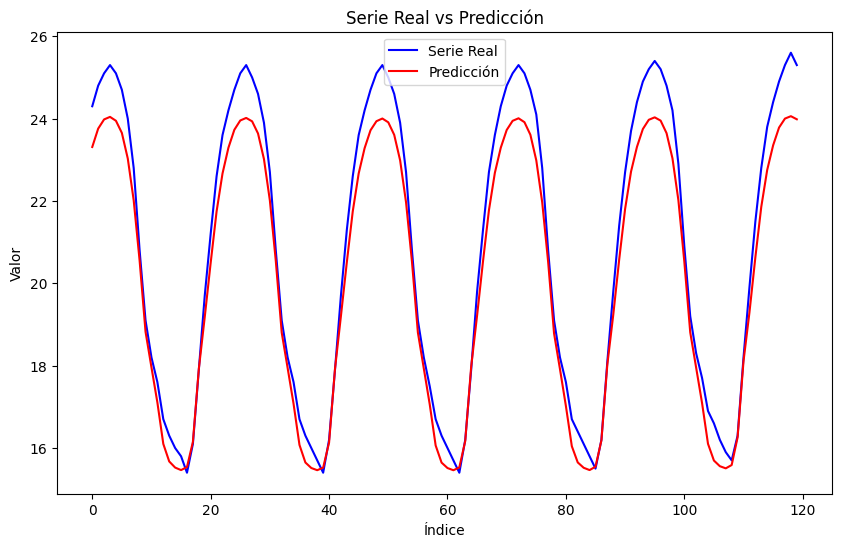

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Serie Real', color='blue')
plt.plot(y_pred_original, label='Predicción', color='red')
plt.title('Serie Real vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

En el caso de este modelo optuna, no tuvo tan buenos resultados como los anteriores. Esto incluso después de que le puse más trials que los anteriores. Aún asi tiene una buena r2.